<a href="https://colab.research.google.com/github/muhamadilyas17/Aplikasi-Login/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Understanding**

**Import Library**

In [40]:
#melakukan import library
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Meload dataste dari github**

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/muhamadilyas17/capstone/main/water_potability.csv'
kualitas_air = pd.read_csv(url)
kualitas_air

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**Cek Tipe Data**

In [3]:
#mengecek dataset
kualitas_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Describe Data**

In [4]:
#mendeskripsikann data
kualitas_air.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **Data Preparation**

**Mengatasi Missing Value**

In [5]:
#cek missing value
kualitas_air.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Mengisi Nilai Null dan Merawat Nilai yang hilang**

Kekerasan merupakan salah satu faktor yang mempengaruhi pH air. Para ilmuwan mengukur kekerasan air menggunakan skala pH, yang mengukur konsentrasi ion hidrogen dalam cairan. Air dengan pH rendah lebih bersifat asam, sedangkan air dengan pH lebih tinggi lebih keras atau lebih basa, artinya mampu menetralkan asam. pH air menentukan kelayakan air.

In [6]:
x = kualitas_air[(kualitas_air['Potability']==0) & (kualitas_air['Hardness']<=150)][['ph']].mean()
x

ph    6.721973
dtype: float64

In [7]:
y = kualitas_air[(kualitas_air['Potability']==0) & (kualitas_air['Hardness']>150)][['ph']].mean()
y

ph    7.112512
dtype: float64

In [8]:
z = kualitas_air[(kualitas_air['Potability']==1) & (kualitas_air['Hardness']<=150)][['ph']].mean()
z

ph    7.098154
dtype: float64

In [9]:
o = kualitas_air[(kualitas_air['Potability']==1) & (kualitas_air['Hardness']>150)][['ph']].mean()
o

ph    7.071429
dtype: float64

In [10]:
#mengisi nilai null
for i in range (0,len(kualitas_air)):
    if (pd.isnull(kualitas_air['ph'][i]) == True):
        if ((kualitas_air['Potability'][i]==0) & (kualitas_air['Hardness'][i]<=150)):
            kualitas_air['ph'][i] = x
        elif ((kualitas_air['Potability'][i]==0) & (kualitas_air['Hardness'][i]>150)):
            kualitas_air['ph'][i] = y
        elif ((kualitas_air['Potability'][i]==1) & (kualitas_air['Hardness'][i]<=150)):
             kualitas_air['ph'][i] = z
        else:
             kualitas_air['ph'][i] = o

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying 

Kehadiran sulfat dalam air minum menghasilkan rasa yang nyata. Itu salah satu faktor penting untuk menentukan kelayakan air

In [11]:
x = kualitas_air[(kualitas_air['Potability']==0)][['Sulfate']].mean()
x

Sulfate    334.56429
dtype: float64

In [12]:
y = kualitas_air[(kualitas_air['Potability']==1)][['Sulfate']].mean()
y

Sulfate    332.56699
dtype: float64

In [13]:
#mengisi nilai null pada kolom sulfate
for i in range(0,len(kualitas_air)):
  if (pd.isnull(kualitas_air['Sulfate'][i]) == True):
    if (kualitas_air['Potability'][i] == 0) :
      kualitas_air['Sulfate'][i] = x
    else :
      kualitas_air['Sulfate'][i] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
#mengisi nilai null pada kolom Trihalomethanes
kualitas_air['Trihalomethanes'].fillna(value = kualitas_air['Trihalomethanes'].mean() , inplace = True)

In [15]:
#mengecek nilai null
kualitas_air.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Jenis-Jenis Air berdasarkan PH :**

*   Air Keran Bervariasi : biasanya sekitar 7,5 
*   Air sulingan reverse osmosis : 5 hingga 7 
*   Air kemasan biasa : 6,5 ​​hingga 7,5
*   Air kemasan biasa : 6,5 ​​hingga 7,5 
*   Air botolan berlabel alkali : 8 hingga 9 
*   Air laut : 8 
*   Hujan asam : 5 hingga 5,5

**Membulatkan PH**

In [16]:
kualitas_air['ph'] = kualitas_air['ph'].round(decimals=1)
kualitas_air['ph'].head()

0    7.1
1    3.7
2    8.1
3    8.3
4    9.1
Name: ph, dtype: float64

**Tipe-Tipe Air**

In [17]:
kualitas_air['Tipe Air'] = ""
for i in range(0,len(kualitas_air)):
  if (kualitas_air['ph'][i] > 9):
    kualitas_air['Tipe Air'][i] = "Air Alkalin"
  elif (kualitas_air['ph'][i] <= 9 and kualitas_air['ph'][i] > 8):
    kualitas_air['Tipe Air'][i] = "Air Kemasan Berlabel Alkalin"
  elif (kualitas_air['ph'][i] <= 8 and kualitas_air['ph'][i] > 7.5):
    kualitas_air['Tipe Air'][i] = "Air Laut"
  elif (kualitas_air['ph'][i] == 7.5):
    kualitas_air['Tipe Air'][i] = "Keran Air"
  elif (kualitas_air['ph'][i] < 7.5 and kualitas_air['ph'][i] >= 6.5):
    kualitas_air['Tipe Air'][i] = "Air Minum Kemasan"
  elif (kualitas_air['ph'][i] < 6.5 and kualitas_air['ph'][i] >= 5.5):
    kualitas_air['Tipe Air'][i] = "Air Sulingan"
  else :
    kualitas_air['Tipe Air'][i] = "Acidic Water"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying

Kekerasan Air yang diklasifikasikan oleh Departemen Dalam Negeri AS dan Asosiasi Kualitas Air sebagai berikut:

Pengklasifikasi : mg/l atau ppm 

*   Lembut : 0 - 17.1 
*   Agak keras : 17,1 - 60
*   Cukup keras : 60 - 120 
*   Keras : 120 - 180 
*   Sangat Keras : 180 ke atas

In [18]:
#klasifikasi kekerasan air
kualitas_air['Tipe Kekerasan'] = ""
for i in range(0,len(kualitas_air)):
  if (kualitas_air['Hardness'][i] >=0 and kualitas_air['Hardness'][i] < 17.1):
    kualitas_air['Tipe Kekerasan'][i] = "Lembut"
  elif (kualitas_air['Hardness'][i] >= 17.1 and kualitas_air['Hardness'][i] < 60):
    kualitas_air['Tipe Kekerasan'][i] = "Agas Keras"
  elif (kualitas_air['Hardness'][i] >= 60 and kualitas_air['Hardness'][i] < 120 ):
    kualitas_air['Tipe Kekerasan'][i] = "Cukup Keras"   
  elif(kualitas_air['Hardness'][i] >= 120 and kualitas_air['Hardness'][i] < 180):
    kualitas_air['Tipe Kekerasan'][i] = "Keras"
  else:
    kualitas_air['Tipe Kekerasan'][i] = "Sangat Keras"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying

In [19]:
kualitas_air.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Tipe Air,Tipe Kekerasan
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Air Minum Kemasan,Sangat Keras
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,Acidic Water,Keras
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,Air Kemasan Berlabel Alkalin,Sangat Keras
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Air Kemasan Berlabel Alkalin,Sangat Keras
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Air Alkalin,Sangat Keras


## **Data Visualization**

In [20]:
#Visualisasi Potability / air dapat di minum
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=kualitas_air['Potability'],name='Box Plot Pembagian Potability',boxmean=True)
tr2=go.Histogram(x=kualitas_air['Potability'],name='Histogram Pembagian Potability')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Pembagian Pembagian Potability")
fig.show()
ex.pie(kualitas_air,names='Potability',title='Pembagian Pembagian Potability',hole=0.33)

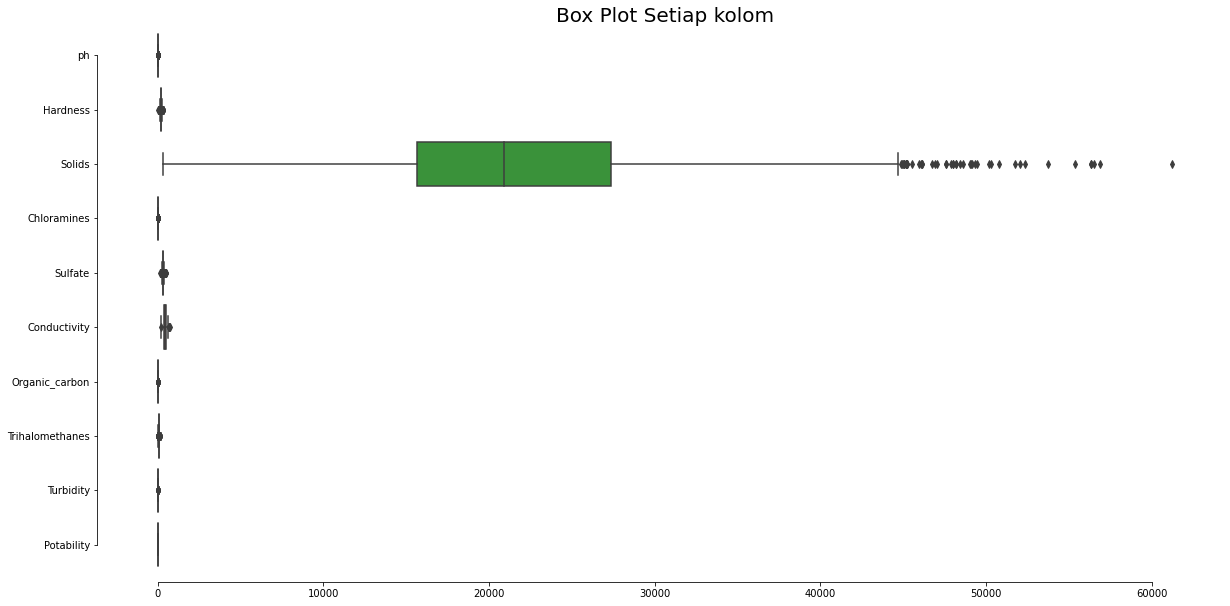

In [21]:
#Box Plot Setiap kolom
fig1, ax = plt.subplots(figsize=[20, 10])
ax = sb.boxplot(data=kualitas_air, orient='h')
sb.despine(offset=10, trim=True)
plt.title('Box Plot Setiap kolom', fontsize=20)
plt.show()

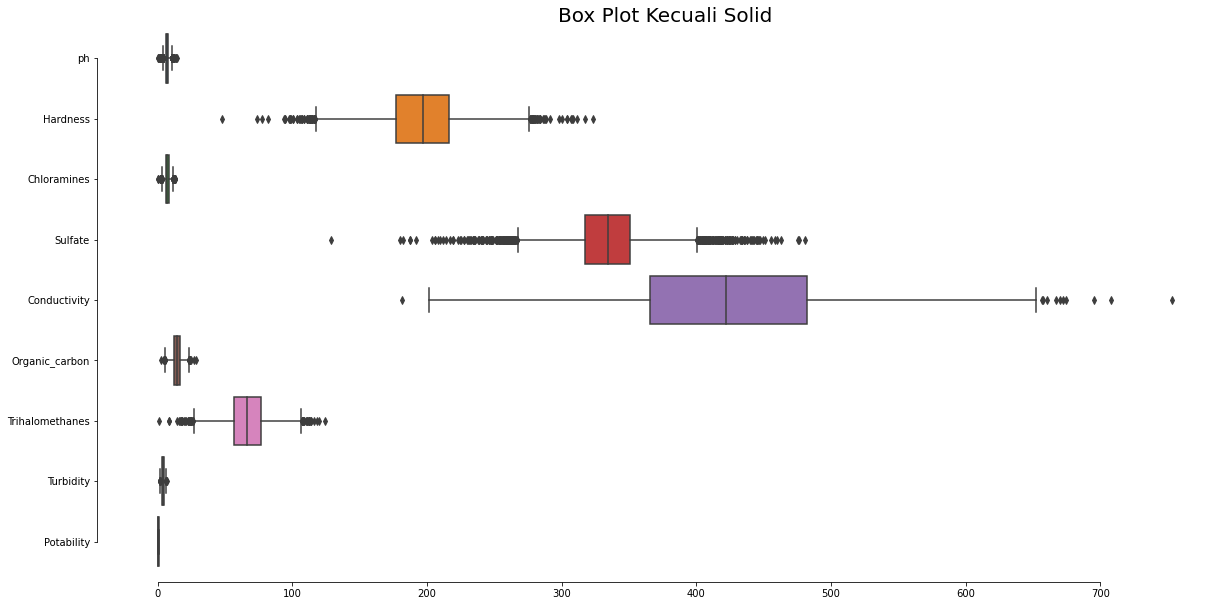

In [22]:
#Box Plot Kecuali Solid
air1 = pd.DataFrame()
air1 = kualitas_air
air1 = air1.drop('Solids',1)
fig1, ax = plt.subplots(figsize=[20,10])
ax = sb.boxplot(data=air1, orient='h')
sb.despine(offset=10, trim=True)
plt.title('Box Plot Kecuali Solid', fontsize=20)
plt.show()

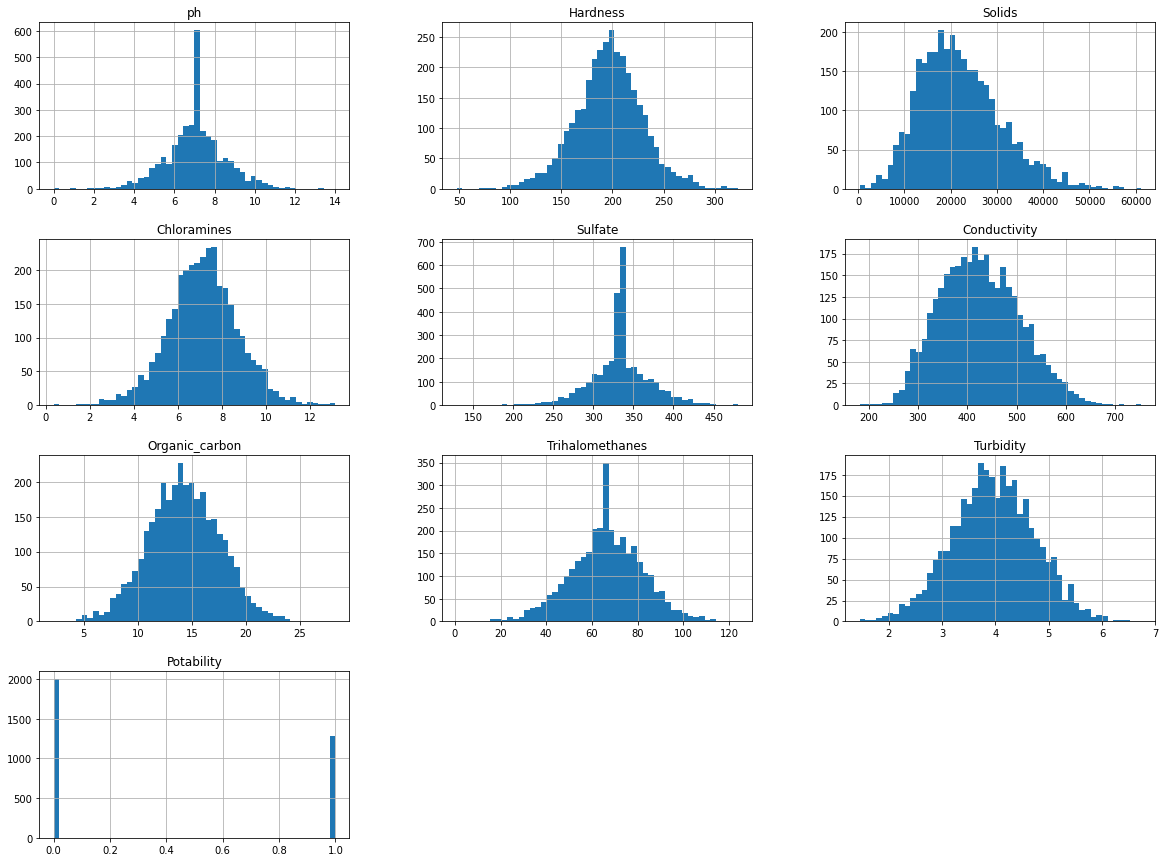

In [23]:
#fitur numerik
kualitas_air.hist(bins=50, figsize=(20,15))
plt.show()

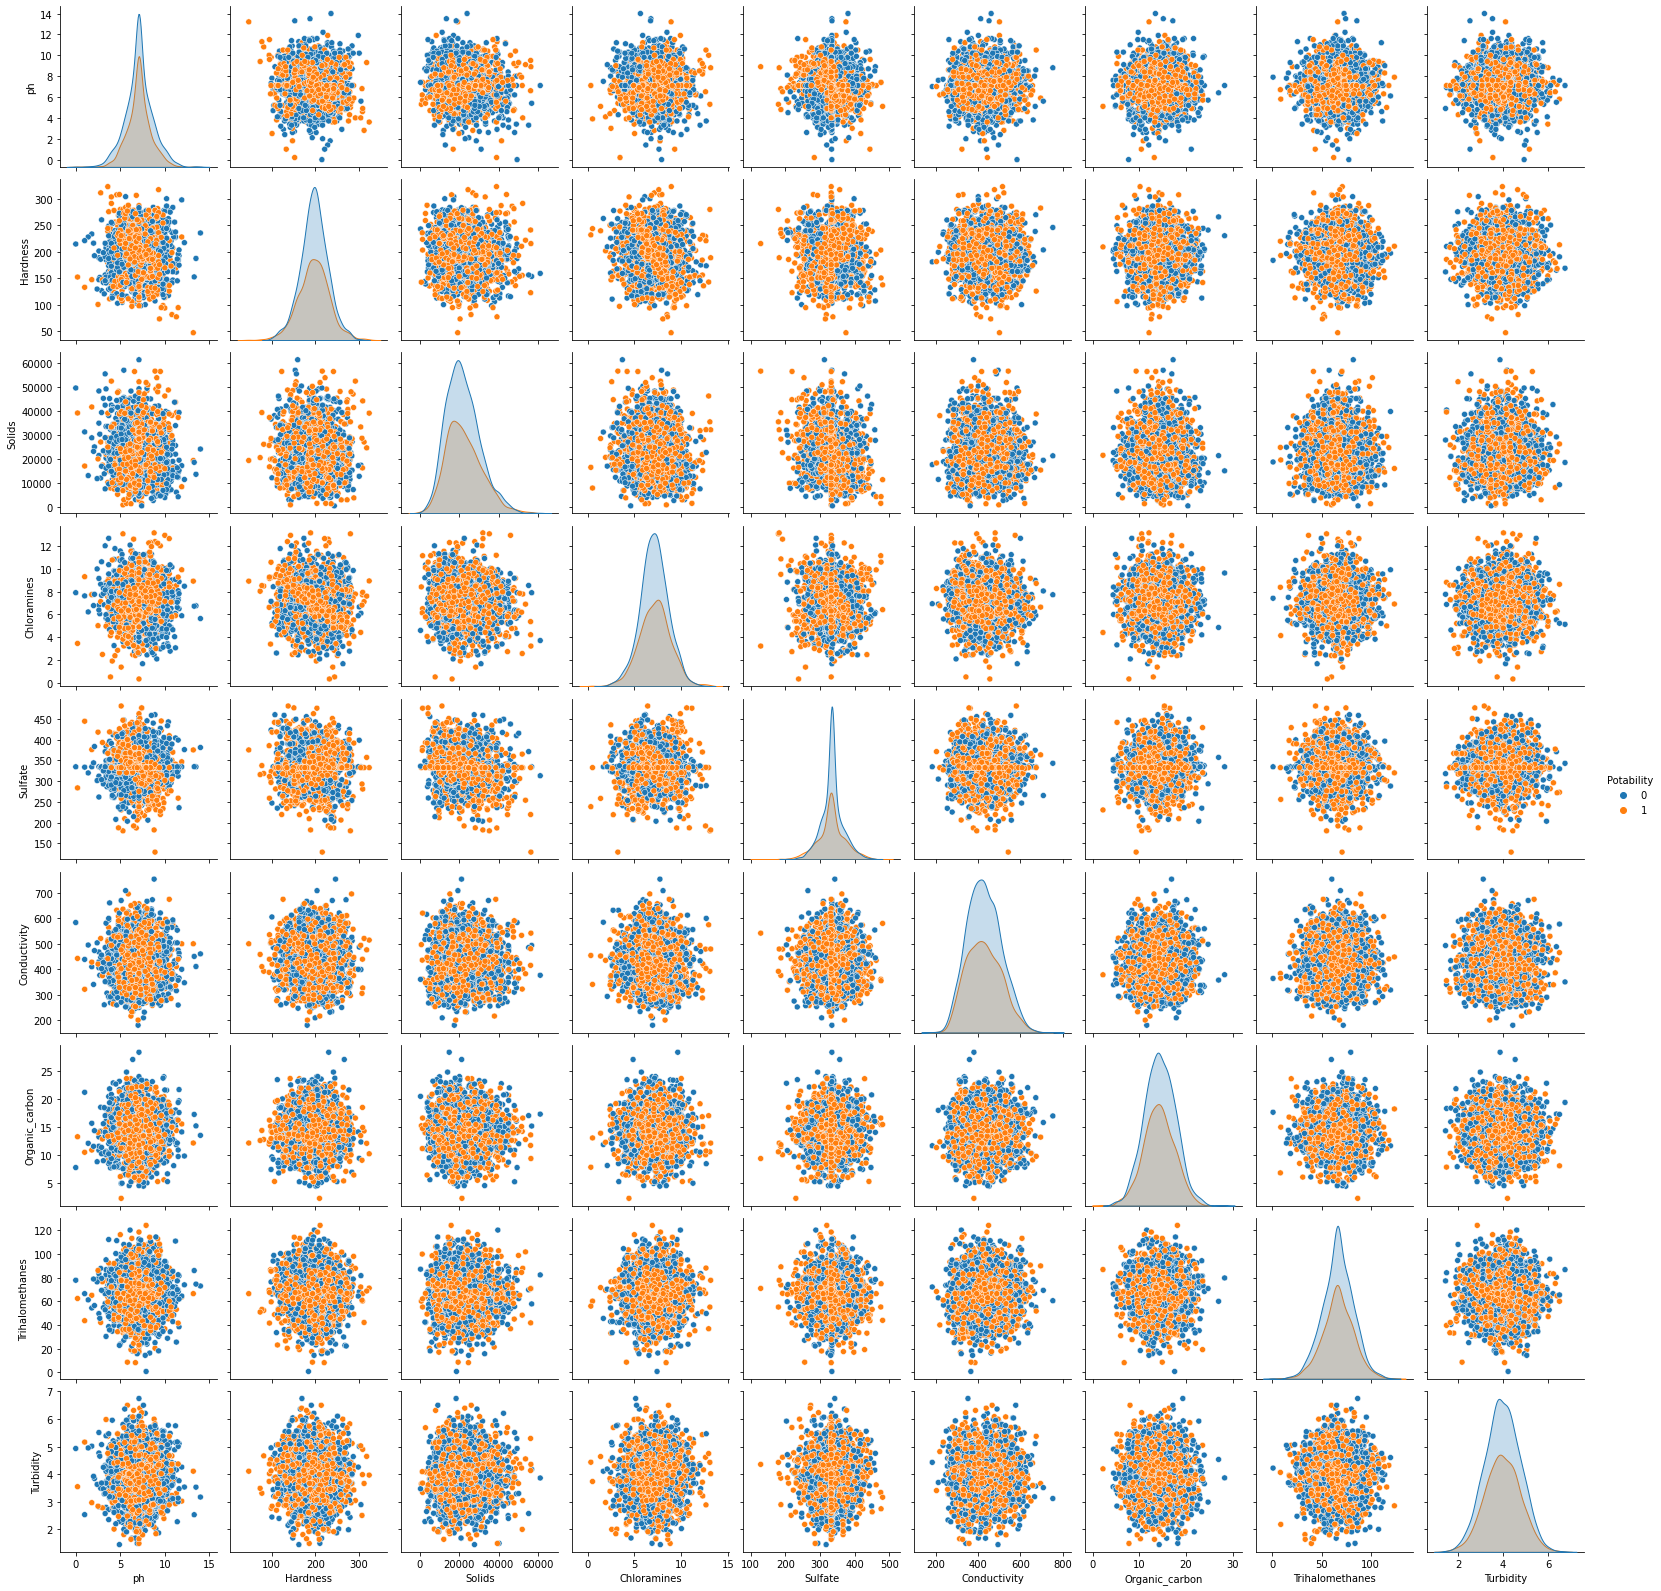

In [24]:
#mengamati hubungan antar fitur numerik
sb.pairplot(kualitas_air, hue='Potability', diag_kind = 'kde')

Text(0.5, 1.0, 'Korelasi Matrix untuk Fitur Numerik')

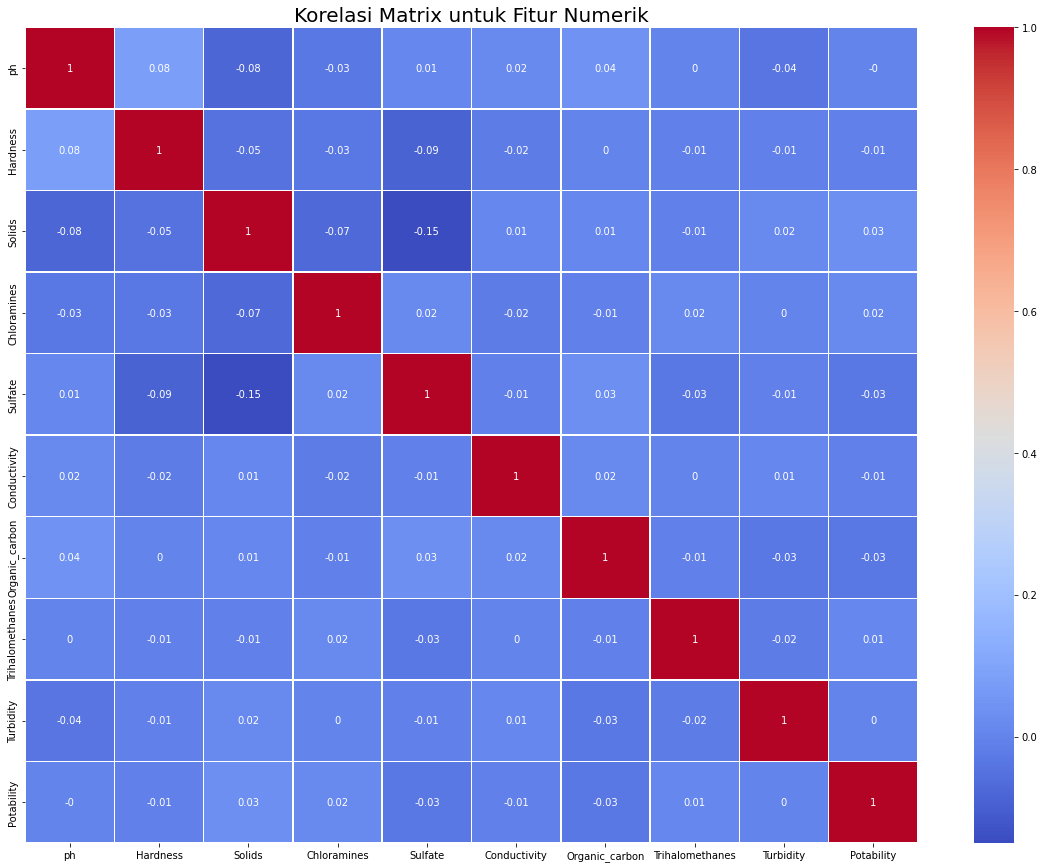

In [25]:
#evaluasi korelasi Matrix untuk Fitur Numerik
plt.figure(figsize=(20,15))
correlation_matrix = kualitas_air.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Matrix untuk Fitur Numerik', size=20)

**Relasi Antar Fitur**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



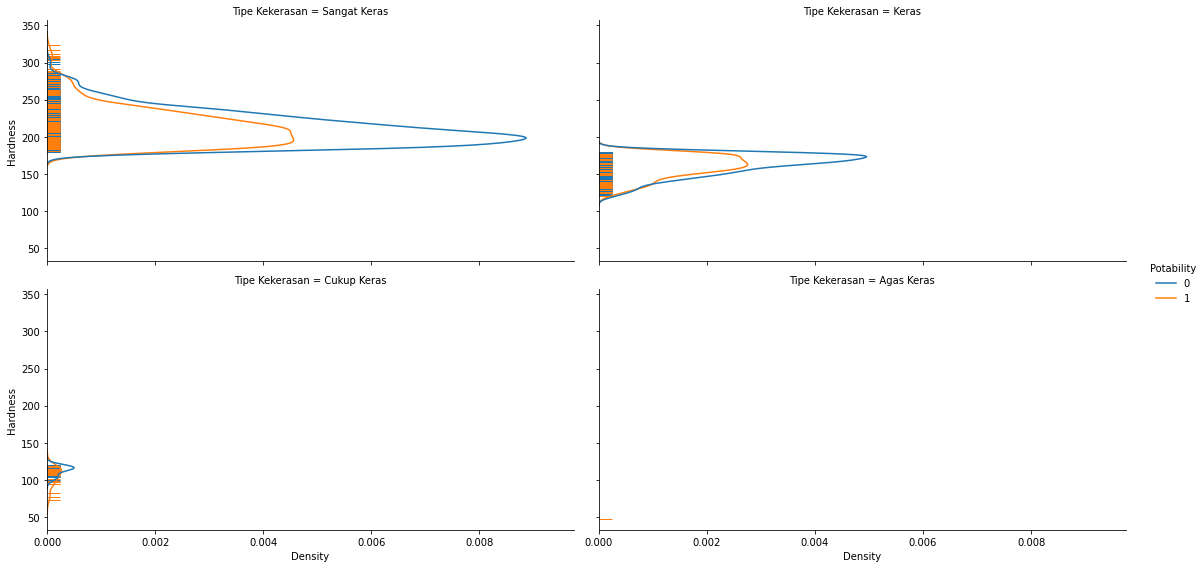

In [26]:
#Hubungan hardness dengan potability
x = sb.displot(data=kualitas_air, y='Hardness', hue='Potability', col='Tipe Kekerasan', 
               col_wrap=2, kind='kde', height=4, aspect=2, rug=True)
plt.show()

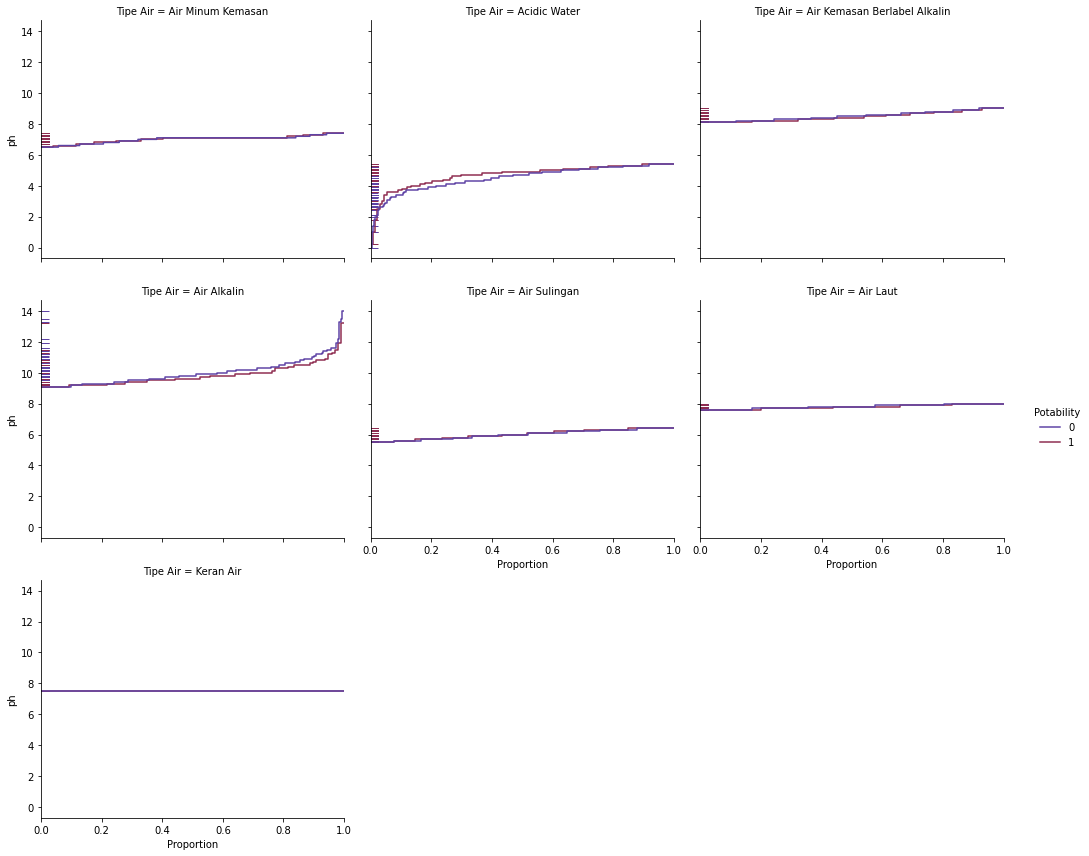

In [29]:
#Hubungan antara ph dan potability
x = sb.displot(data=kualitas_air, y='ph', hue='Potability', col='Tipe Air', palette = 'twilight', col_wrap=3,
    kind='ecdf', height=4, aspect=1.2,rug=True)
plt.show()

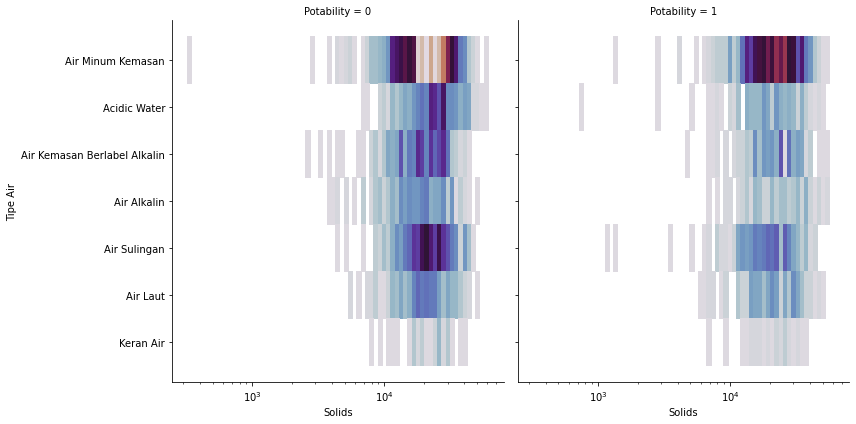

In [33]:
#Hubungan Antara Solid dan Potability
x = sb.displot(data=kualitas_air, x='Solids', y='Tipe Air', col='Potability', cmap = 'twilight', 
               log_scale=(True, False), col_wrap=4, height=6, aspect=.9)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning:

The following kwargs were not used by contour: 'aspect'



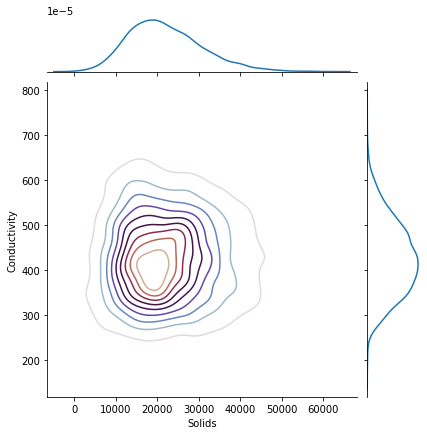

In [34]:
#Hubungan antara Solids dengan Conductivity
x = sb.jointplot(data=kualitas_air, x='Solids', y='Conductivity', cmap = 'twilight', 
               kind='kde', height=6, aspect=.9)
plt.show()

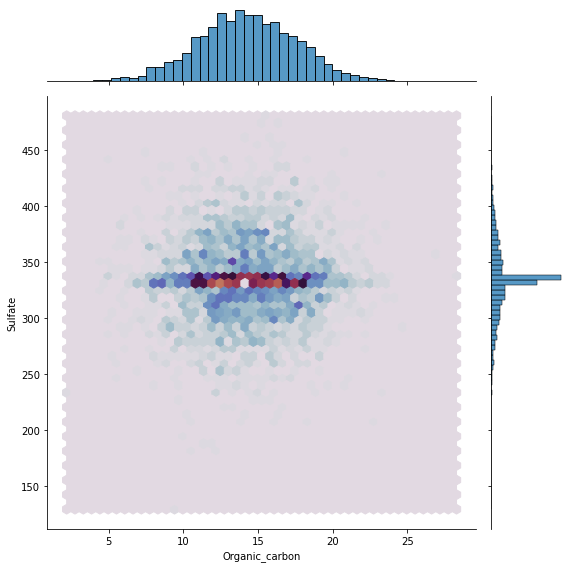

In [35]:
#Hubungan antara Organic_carbon dan Sulfat
x = sb.jointplot(data=kualitas_air, x='Organic_carbon', y='Sulfate', cmap = 'twilight', 
               kind='hex', height=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



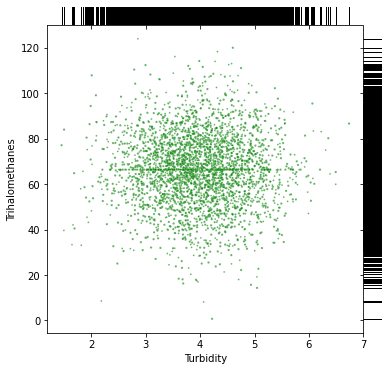

In [37]:
#Hubungan antara Turbidity dan Trihalomethanes
x = sb.JointGrid(data=kualitas_air, x="Turbidity", y="Trihalomethanes", space=0, ratio=17)
x.plot_joint(sb.scatterplot, size=kualitas_air["Potability"], sizes=(3, 5),
             color="green", alpha=.6, legend=False)
x.plot_marginals(sb.rugplot, height=15, alpha=1,color="Black")

## **Data Preprocessing**

**One-Hot-Encoding**

In [39]:
data = pd.get_dummies(kualitas_air, columns = ['Tipe Air', 'Tipe Kekerasan'])
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Tipe Air_Acidic Water,Tipe Air_Air Alkalin,Tipe Air_Air Kemasan Berlabel Alkalin,Tipe Air_Air Laut,Tipe Air_Air Minum Kemasan,Tipe Air_Air Sulingan,Tipe Air_Keran Air,Tipe Kekerasan_Agas Keras,Tipe Kekerasan_Cukup Keras,Tipe Kekerasan_Keras,Tipe Kekerasan_Sangat Keras
0,7.1,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0,0,0,0,1,0,0,0,0,0,1
1,3.7,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0,1,0,0,0,0,0,0,0,0,1,0
2,8.1,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0,0,0,1,0,0,0,0,0,0,0,1
3,8.3,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0,1,0,0,0,0,0,0,0,1
4,9.1,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,1,0,0,0,0,0,0,0,0,1


**Split Dataset**

In [42]:
#Split Dataset
x = data.drop(['Potability'], axis=1)
y = data['Potability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.75, random_state=83)

**Standarisasi data**

In [44]:
#standarisasi data
scaller = StandardScaler()
X_train = scaller.fit_transform(x_train)
X_test = scaller.fit_transform(x_test)